# First Order Optimization Algorithms

In [1]:
import numpy as np

X = 10*(2 * np.random.rand(100, 1) - 1)
y = 2*X + 3 + 15*np.random.rand(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

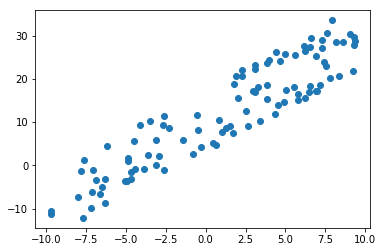

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.show()

# Batch Gradient Descent

[[6.16441033]
 [2.15480713]]


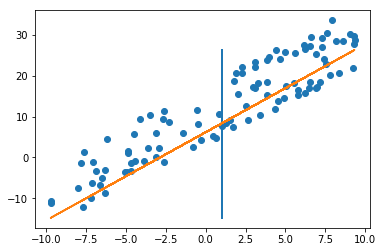

Mean squared error : [33.55575123]


In [5]:
# Batch Gradient Descent

epochs = 500
alpha = 0.001    # learning rate
m = 100

theta = np.random.rand(2, 1)
for epoch in range(epochs):
    gradient = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha*(gradient)

print(theta)

plt.scatter(X, y)
plt.plot(X_b, X_b.dot(theta))
plt.show()

error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# Stochastic Gradient Descent

[[11.13611587]
 [ 1.91271524]]
Mean squared error : [18.16292301]


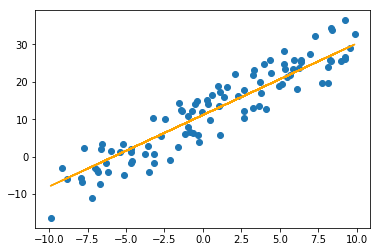

In [4]:
n_epochs = 50
t0, t1 = 5, 1000

learning_schedule = lambda t: t0/(t+t1)

theta = np.random.randn(2, 1)
plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradient

plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# Mini_Batch Gradient Descent

[[10.9847181]
 [ 2.0770969]]
Mean squared error : [17.39577712]


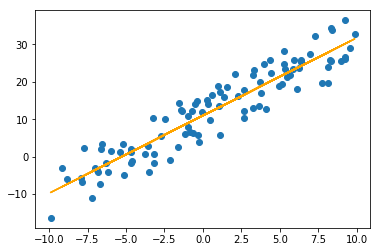

In [5]:
# Mini_Batch Gradient Descent

n_epochs = 100
t0, t1 = 5, 1000
batch_size = 50

learning_schedule = lambda t: t0/(t+t1)

theta = np.random.randn(2, 1)
plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Update learning rate
        eta = learning_schedule(epoch*m+i)
        
        # Update weights
        theta = theta - eta*gradient
        
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# Momentum

[[11.00725212]
 [ 2.07947008]]
Mean squared error : [17.3961284]


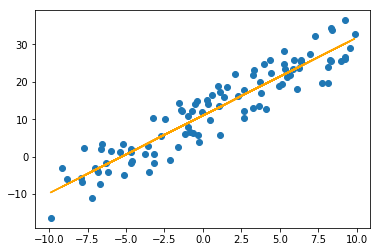

In [6]:
# Adapting alpha over time is less important than shrinking eta over time


n_epochs = 50
t0, t1 = 5, 1000
batch_size = 50
alpha = 0.9

learning_schedule = lambda t: t0/(t+t1)

theta = np.random.randn(2, 1)
v = np.random.randn(2, 1)
plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Update learning rate
        eta = learning_schedule(epoch*m+i)
        
        # Compute velocity update
        v = alpha*v - eta*gradient
        
        # Update Weights
        theta = theta + v
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# Nesterov Accelarated Gradient

[[10.81468556]
 [ 2.08401428]]
Mean squared error : [17.42647231]


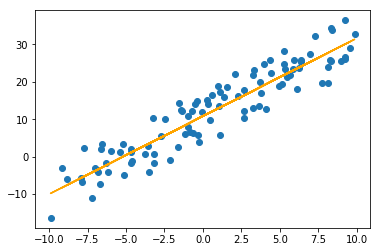

In [7]:
n_epochs = 10
t0, t1 = 5, 1000
batch_size = 50
alpha = 0.9

learning_schedule = lambda t: t0/(t+t1)

theta = np.random.randn(2, 1)
v = np.random.randn(2, 1)
plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Apply interim update
        theta = theta + alpha*v
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Update learning rate
        eta = learning_schedule(epoch*m+i)
        
        # Compute velocity update
        v = alpha*v - eta*gradient
        
        # Update Weights
        theta = theta + v
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# AdaGrad

[[10.97276947]
 [ 2.10200414]]
Mean squared error : [17.41251102]


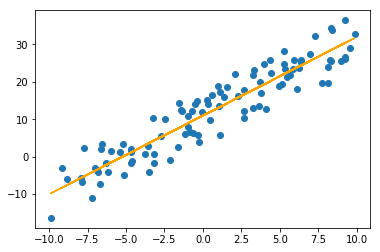

In [23]:
n_epochs = 200
batch_size = 50
eta = 1
r = 0
delta = 10**-7

theta = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Accumulate squared gradient
        r = r + np.multiply(gradient, gradient)
        
        # Compute update
        del_theta = - eta * np.multiply(1/(delta + np.sqrt(r)), gradient)
        
        # Update Weights
        theta = theta + del_theta
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# RMSProp 

[[10.88851468]
 [ 2.27414092]]
Mean squared error : [18.48527688]


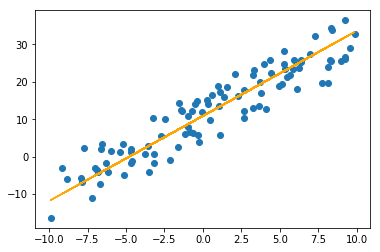

In [25]:
n_epochs = 200
batch_size = 50
eta = 0.5
rho = 0.99
r = 0
delta = 10**-7

theta = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Accumulate squared gradient
        r = rho*r + (1-rho)*np.multiply(gradient, gradient)
        
        # Compute update
        del_theta = - eta * np.multiply(1/(delta + np.sqrt(r)), gradient)
        
        # Update Weights
        theta = theta + del_theta
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# RMSProp with Nesterov Accelarated Gradient

[[10.46598686]
 [ 2.22632381]]
Mean squared error : [18.19850191]


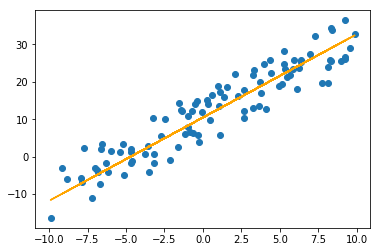

In [27]:
n_epochs = 200
batch_size = 50
eta = 0.5
rho = 0.99
r = 0
delta = 10**-7

theta = np.random.randn(2, 1)
v = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute interim update
        theta = theta + alpha*v
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Accumulate squared gradient
        r = rho*r + (1-rho)*np.multiply(gradient, gradient)
        
        # Compute update
        del_theta = - eta * np.multiply(1/(delta + np.sqrt(r)), gradient)
        
        # Update Weights
        theta = theta + del_theta
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# Adam

[[10.99686518]
 [ 2.06875964]]
Mean squared error : [17.39792754]


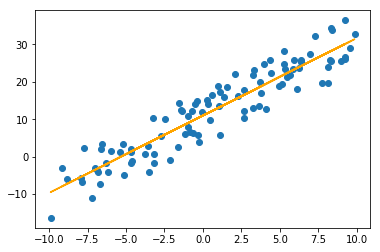

In [28]:
n_epochs = 200
batch_size = 50
eta = 0.001
rho1 = 0.9
rho2 = 0.999
r = 0
s = 0
t = 0
delta = 10**-7

theta = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Update time step
        t = t+1
        
        # Update biased first moment
        s = rho1*s + (1-rho1)*gradient
        
        # Update biased second moment
        r = rho2*r + (1-rho2)*np.multiply(gradient, gradient)
        
        # Correct bias in first moment
        s_hat = s / (1+rho1**t)
        
        # Correct bias in first moment
        r_hat = r / (1+rho2**t)
        
        # Compute update
        del_theta = - eta * np.multiply(1/(delta + np.sqrt(r_hat)), s_hat)
        
        # Update Weights
        theta = theta + del_theta
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# ADADelta

[[11.07040088]
 [ 1.82982257]]
Mean squared error : [19.13386243]


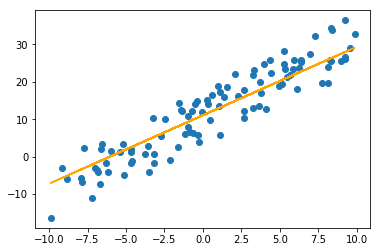

In [33]:
def rms(x, eta):
    return np.sqrt(np.mean(x**2) + eta)


n_epochs = 10
batch_size = 50
eta = 0.0001
rho = 0.9
r = 0
del_theta = 0

theta = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Accumulate Gradient
        r = rho*r + (1-rho)*np.square(gradient)
        
        # Compute Update
        del_theta = - rms(del_theta, eta) / rms(gradient, eta) * gradient
        
        # Update Weights
        theta = theta + del_theta
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# Linear Conjugate Gradient Method

[[11.04619736]
 [ 2.01361873]]
Mean squared error : [17.51121583]


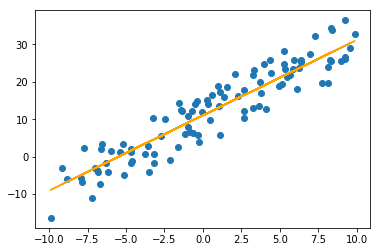

In [52]:
from scipy.optimize import minimize

np.seterr(all='ignore')

import warnings
warnings.filterwarnings('ignore')

n_epochs = 20
batch_size = 50
eta = 0
rho = 0
r = 0
prevGrad = []

theta = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Compute beta
        if prevGrad!=[]:
            beta = ((gradient - prevGrad).T.dot(gradient)) / (prevGrad.T.dot(prevGrad))
        else:
            beta = 0
        
        # Compute Search Direction
        rho = -gradient + beta*rho
        
        
        # Compute learning rate
        eta = np.random.rand(1)
        
        def fun(eta):
            return np.mean((xi.dot(theta +eta*rho) - yi)**2)
        
        res = minimize(fun, eta)
        
        eta = res.x
        
        # Update Weights
        theta = theta + eta[0]*rho
        
        # Update previous gradient
        prevGrad = gradient
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# Non Linear Conjugate Gradient Method

[[11.47895774]
 [ 2.1952011 ]]
Mean squared error : [18.10820775]


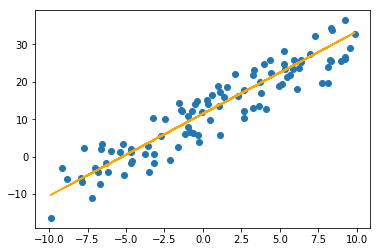

In [53]:
from scipy.optimize import minimize

np.seterr(all='ignore')

import warnings
warnings.filterwarnings('ignore')

n_epochs = 20
batch_size = 50
eta = 0
rho = 0
r = 0
prevGrad = []

theta = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Compute beta and set beta = 0 if i%20==0
        if prevGrad!=[] and i%20!=0:
            beta = ((gradient - prevGrad).T.dot(gradient)) / (prevGrad.T.dot(prevGrad))
        else:
            beta = 0
        
        # Compute Search Direction
        rho = -gradient + beta*rho
        
        
        # Compute learning rate
        eta = np.random.rand(1)
        
        def fun(eta):
            return np.mean((xi.dot(theta +eta*rho) - yi)**2)
        
        res = minimize(fun, eta)
        
        eta = res.x
        
        # Update Weights
        theta = theta + eta[0]*rho
        
        # Update previous gradient
        prevGrad = gradient
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# ADAMax

[[9.41807629]
 [2.02831283]]
Mean squared error : [21.50756579]


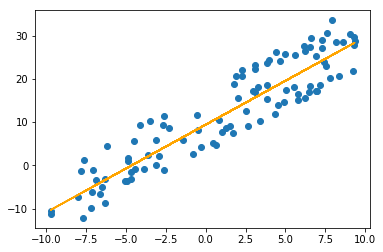

In [12]:
n_epochs = 200
batch_size = 50
eta = 0.002
rho1 = 0.9
rho2 = 0.999
r = 0
s = 0
t = 0

theta = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Update time step
        t = t+1
        
        # Update biased first moment
        s = rho1*s + (1-rho1)*gradient
        
        # Update biased second moment
        r = max(rho2*r, np.linalg.norm(gradient, 1))
        
        # Update Weights
        theta = theta - eta/(1-rho1**t)*np.divide(s, r)
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)